## 第一课-构建线性回归模型-理解Loss函数-理解梯度下降

In [1]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [2]:
data = load_boston()

In [38]:
X, y = data['data'], data['target']

In [4]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [5]:
y[1]

21.6

In [6]:
len(X[:, 0])

506

In [7]:
len(y)

506

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

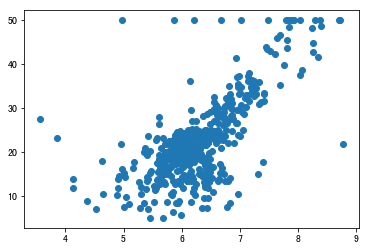

In [11]:
draw_rm_and_price()

In [12]:
import random

In [13]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

In [14]:
from IPython import display

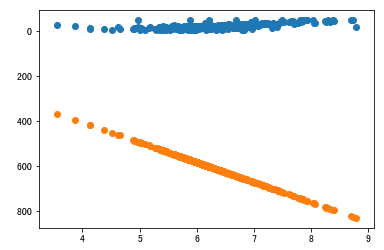

In [19]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
plt.scatter(X[:, 5], y)
plt.scatter(X_rm, price_by_random_k_and_b)

$$ \hat{y} $$

In [21]:
[1, 1, 1]
[2, 2, 2]

[2, 2, 2]

## 如何衡量每条直线的到底好不好呢？

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [22]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [23]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -89.09769113301729 best_b: -26.437897958797834, and the loss is: 375574.8157891617
When time is : 1, get best_k: -26.152135046872445 best_b: 5.979936505535235, and the loss is: 33384.191458241025
When time is : 10, get best_k: -27.440412009309426 best_b: 67.55268719722017, and the loss is: 16940.712856096525
When time is : 11, get best_k: 6.418730914921795 best_b: 44.566133772893494, and the loss is: 3937.502476599518
When time is : 23, get best_k: -10.373437070027308 best_b: 77.59231769860136, and the loss is: 333.17116446525944
When time is : 105, get best_k: 13.952288163631337 best_b: -54.059406068376404, and the loss is: 178.24143327481733
When time is : 290, get best_k: 12.39425058975175 best_b: -57.081170707421826, and the loss is: 51.90109356861186
When time is : 755, get best_k: 8.980168568941039 best_b: -33.74070528176205, and the loss is: 43.63463125904183


In [24]:
10 ** 0.5

3.1622776601683795

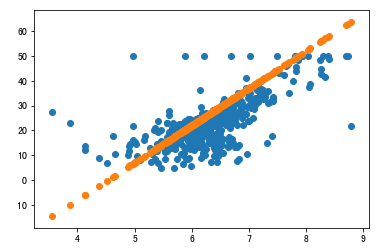

In [25]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [26]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 14, get best_k: -67.61228290571975 best_b: 69.97465615518044, and the loss is: 145431.7650767233
When time is : 24, get best_k: -66.61228290571981 best_b: 70.97465615518038, and the loss is: 139910.17158807087
When time is : 34, get best_k: -65.61228290571987 best_b: 71.97465615518033, and the loss is: 134495.69528616557
When time is : 44, get best_k: -64.61228290571992 best_b: 72.97465615518027, and the loss is: 129188.33617100731
When time is : 54, get best_k: -63.61228290571995 best_b: 73.97465615518021, and the loss is: 123988.09424259608
When time is : 64, get best_k: -62.61228290571994 best_b: 74.97465615518016, and the loss is: 118894.9695009316
When time is : 74, get best_k: -61.61228290571992 best_b: 75.9746561551801, and the loss is: 113908.96194601398
When time is : 84, get best_k: -60.61228290571991 best_b: 76.97465615518004, and the loss is: 109030.07157784358
When time is : 94, get best_k: -59.612282905719894 best_b: 77.97465615517999, and the loss is: 1042

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## 导数

In [27]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [28]:
from icecream import ic

In [29]:
trying_times = 2000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 171035.130195033
When time is : 50, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 75163.97396109794
When time is : 100, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 33062.50723407979
When time is : 150, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 14573.798440317154
When time is : 200, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 6454.543931672215
When time is : 250, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 2888.9964697897917
When time is : 300, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 1323.1924184743843
When time is : 350, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the loss is: 635.568204262482
When time is : 400, get best_k: -14.51228290571928 best_b: 115.67465615517784, and the los

506 506


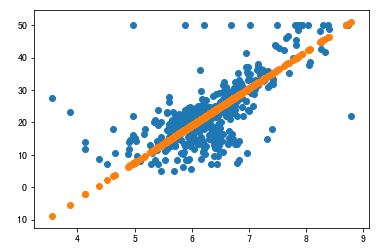

In [39]:
X_rm = X[:, 5]
k = 11.431551629413757
b = -49.52403584539048
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

plt.scatter(X[:, 5], y)

print(len(X_rm), len(price_by_random_k_and_b))
plt.scatter(X_rm, price_by_random_k_and_b)

## Assignment01

## 1. 复现课程代码
## 2. 改变Loss函数 重新书写Loss Function的Python代码